In [1]:
import pymongo
import logging
import matplotlib.pyplot as plt
import statistics
import dotenv
import os

from src.metrics.connection_time import connection_time
from src.metrics.latency import latency
from src.metrics.query_execution_time import query_execution_time
from src.metrics.throughput import throughput
from src.metrics.write_performance import write_performance
from src.utils.filter_outliers import filter_outliers
from src.utils.statistical_importance import is_statistically_significant

dotenv.load_dotenv(dotenv_path="resources/secrets.env")

logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(message)s",
)

In [2]:
client = pymongo.MongoClient(os.environ["MONGO_URI"])

In [3]:
for name in client.list_database_names():
    print(name)

firma
nieruchomosci
test
admin
local


### Latency test

In [4]:
avg_latency_1, each_run_latency_1 = latency(
    n=1000,
    client=client,
    database="nieruchomosci",
    collection="boston",
)
avg_latency_2, each_run_latency_2 = latency(
    n=1000,
    client=client,
    database="nieruchomosci",
    collection="boston",
)

2026-01-03 20:01:09,165 - Checking latency...
2026-01-03 20:01:46,140 - Time to fully execute find() 1000 times: 36 ms
2026-01-03 20:01:46,140 - Checking latency...
2026-01-03 20:02:23,099 - Time to fully execute find() 1000 times: 36 ms


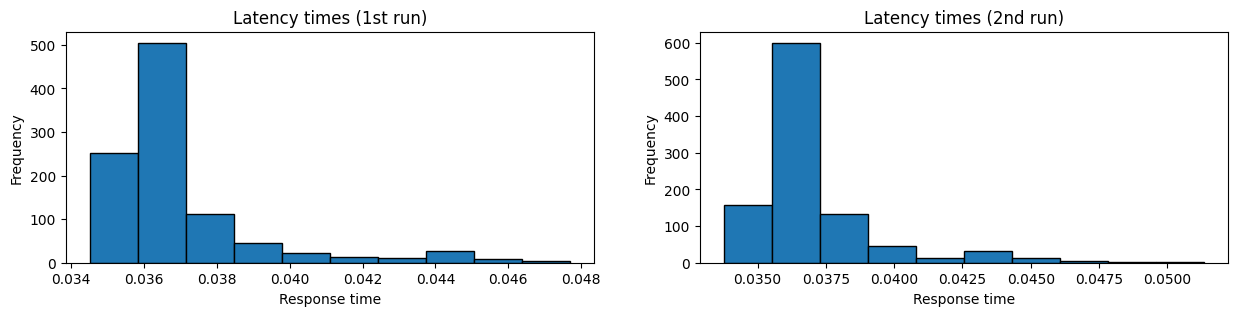

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3))
axes[0].hist(each_run_latency_1, bins=10, edgecolor="black")
axes[0].set_title("Latency times (1st run)")
axes[0].set_xlabel("Response time")
axes[0].set_ylabel("Frequency")

axes[1].hist(each_run_latency_2, bins=10, edgecolor="black")
axes[1].set_title("Latency times (2nd run)")
axes[1].set_xlabel("Response time")
axes[1].set_ylabel("Frequency")
plt.show()

In [6]:
filtered_each_run_latency_1 = filter_outliers(each_run_latency_1)
filtered_each_run_latency_2 = filter_outliers(each_run_latency_2)

In [7]:
print(
    f"Executed 1000 queries.\nAverage time: {sum(filtered_each_run_latency_1) / len(filtered_each_run_latency_1):.6f} sec"
)
print(f" Median time: {statistics.median(filtered_each_run_latency_1):.6f} sec")
print(
    f"Executed 1000 queries.\nAverage time: {sum(filtered_each_run_latency_2) / len(filtered_each_run_latency_2):.6f} sec"
)
print(f" Median time: {statistics.median(filtered_each_run_latency_2):.6f} sec")

Executed 1000 queries.
Average time: 0.036304 sec
 Median time: 0.036151 sec
Executed 1000 queries.
Average time: 0.036352 sec
 Median time: 0.036128 sec


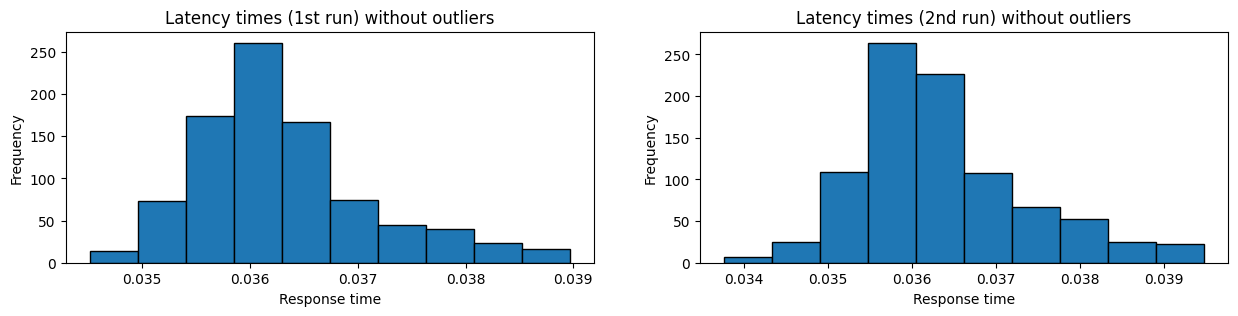

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3))
axes[0].hist(filtered_each_run_latency_1, bins=10, edgecolor="black")
axes[0].set_title("Latency times (1st run) without outliers")
axes[0].set_xlabel("Response time")
axes[0].set_ylabel("Frequency")

axes[1].hist(filtered_each_run_latency_2, bins=10, edgecolor="black")
axes[1].set_title("Latency times (2nd run) without outliers")
axes[1].set_xlabel("Response time")
axes[1].set_ylabel("Frequency")
plt.show()

In [9]:
is_statistically_significant(
    first_data=filtered_each_run_latency_1, second_data=filtered_each_run_latency_2
)

2026-01-03 20:02:23,711 - Shapiro-Wilk Test for first dataset: p-value = 1.6249957973863018e-17
2026-01-03 20:02:23,711 - Shapiro-Wilk Test for second dataset: p-value = 6.86836944657507e-18
2026-01-03 20:02:23,712 - At least one list is not normally distributed, I perform the Mann-Whitney test.
2026-01-03 20:02:23,714 - Mann-Whitney U Test: p-value = 0.9527538905955538, so...
2026-01-03 20:02:23,714 - There is no basis to reject H0 that the difference in distributions is not statistically significant.


### Query execution time test

In [10]:
each_run_query_execution_time_1 = query_execution_time(
    n=1000,
    client=client,
    database="nieruchomosci",
    collection="boston",
)
each_run_query_execution_time_2 = query_execution_time(
    n=1000,
    client=client,
    database="nieruchomosci",
    collection="boston",
)

2026-01-03 20:02:23,762 - Checking query execution time...
2026-01-03 20:02:23,800 - Query execution time: 1
2026-01-03 20:02:23,839 - Query execution time: 1
2026-01-03 20:02:23,878 - Query execution time: 1
2026-01-03 20:02:23,917 - Query execution time: 1
2026-01-03 20:02:23,954 - Query execution time: 1
2026-01-03 20:02:23,993 - Query execution time: 1
2026-01-03 20:02:24,032 - Query execution time: 1
2026-01-03 20:02:24,077 - Query execution time: 1
2026-01-03 20:02:24,114 - Query execution time: 1
2026-01-03 20:02:24,154 - Query execution time: 1
2026-01-03 20:02:24,194 - Query execution time: 1
2026-01-03 20:02:24,233 - Query execution time: 1
2026-01-03 20:02:24,273 - Query execution time: 1
2026-01-03 20:02:24,311 - Query execution time: 1
2026-01-03 20:02:24,349 - Query execution time: 1
2026-01-03 20:02:24,386 - Query execution time: 1
2026-01-03 20:02:24,426 - Query execution time: 1
2026-01-03 20:02:24,463 - Query execution time: 1
2026-01-03 20:02:24,500 - Query execution

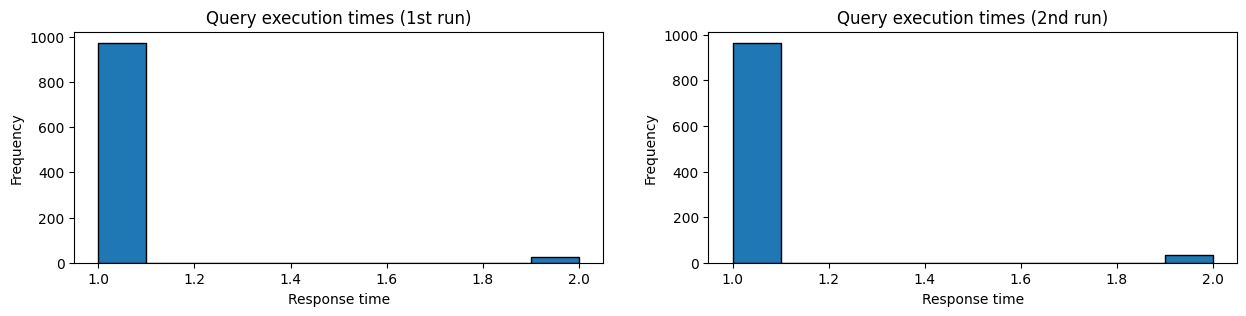

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3))
axes[0].hist(each_run_query_execution_time_1, bins=10, edgecolor="black")
axes[0].set_title("Query execution times (1st run)")
axes[0].set_xlabel("Response time")
axes[0].set_ylabel("Frequency")

axes[1].hist(each_run_query_execution_time_2, bins=10, edgecolor="black")
axes[1].set_title("Query execution times (2nd run)")
axes[1].set_xlabel("Response time")
axes[1].set_ylabel("Frequency")
plt.show()

In [12]:
filtered_each_run_query_execution_time_1 = filter_outliers(
    each_run_query_execution_time_1
)
filtered_each_run_query_execution_time_2 = filter_outliers(
    each_run_query_execution_time_2
)

In [13]:
print(
    f"Executed 1000 queries.\nAverage time: {sum(filtered_each_run_query_execution_time_1) / len(filtered_each_run_query_execution_time_1):.6f} sec"
)
print(
    f" Median time: {statistics.median(filtered_each_run_query_execution_time_1):.6f} sec"
)
print(
    f"Executed 1000 queries.\nAverage time: {sum(filtered_each_run_query_execution_time_2) / len(filtered_each_run_query_execution_time_2):.6f} sec"
)
print(
    f" Median time: {statistics.median(filtered_each_run_query_execution_time_2):.6f} sec"
)

Executed 1000 queries.
Average time: 1.000000 sec
 Median time: 1.000000 sec
Executed 1000 queries.
Average time: 1.000000 sec
 Median time: 1.000000 sec


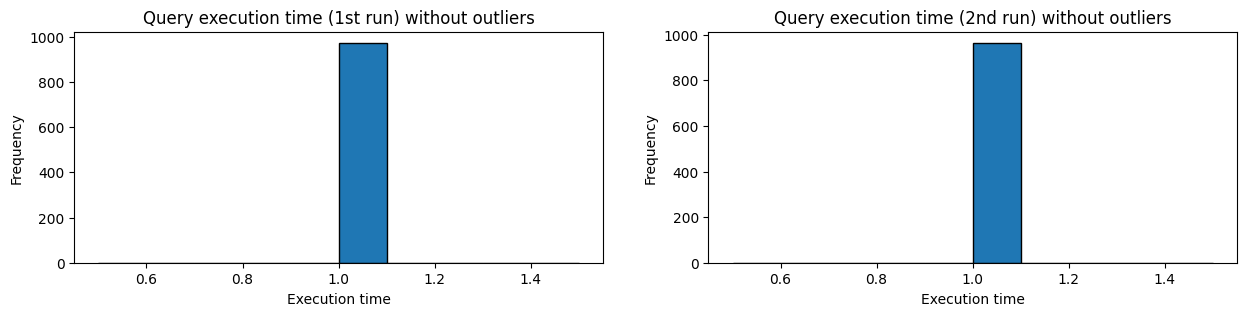

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3))
axes[0].hist(filtered_each_run_query_execution_time_1, bins=10, edgecolor="black")
axes[0].set_title("Query execution time (1st run) without outliers")
axes[0].set_xlabel("Execution time")
axes[0].set_ylabel("Frequency")

axes[1].hist(filtered_each_run_query_execution_time_2, bins=10, edgecolor="black")
axes[1].set_title("Query execution time (2nd run) without outliers")
axes[1].set_xlabel("Execution time")
axes[1].set_ylabel("Frequency")
plt.show()

In [15]:
is_statistically_significant(
    first_data=filtered_each_run_query_execution_time_1,
    second_data=filtered_each_run_query_execution_time_2,
)

/home/matiar/Programming/ODZD/.venv/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)
2026-01-03 20:03:40,834 - Shapiro-Wilk Test for first dataset: p-value = 1.0
2026-01-03 20:03:40,835 - Shapiro-Wilk Test for second dataset: p-value = 1.0
2026-01-03 20:03:40,835 - There is no basis to reject H0 that both lists are normally distributed.
/home/matiar/Programming/ODZD/.venv/lib/python3.13/site-packages/scipy/stats/_morestats.py:3104: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom
2026-01-03 20:03:40,838 - Levene's Test: p-value = nan
2026-01-03 20:03:40,838 - Variances are not equal, I am doing t-Welch test.
/home/matiar/Programming/ODZD/.venv/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:579: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. Th

### Throughput test

In [16]:
avg_throughput_1, each_run_throughput_1 = throughput(
    n=1000,
    client=client,
    database="nieruchomosci",
    collection="boston",
)
avg_throughput_2, each_run_throughput_2 = throughput(
    n=1000,
    client=client,
    database="nieruchomosci",
    collection="boston",
)

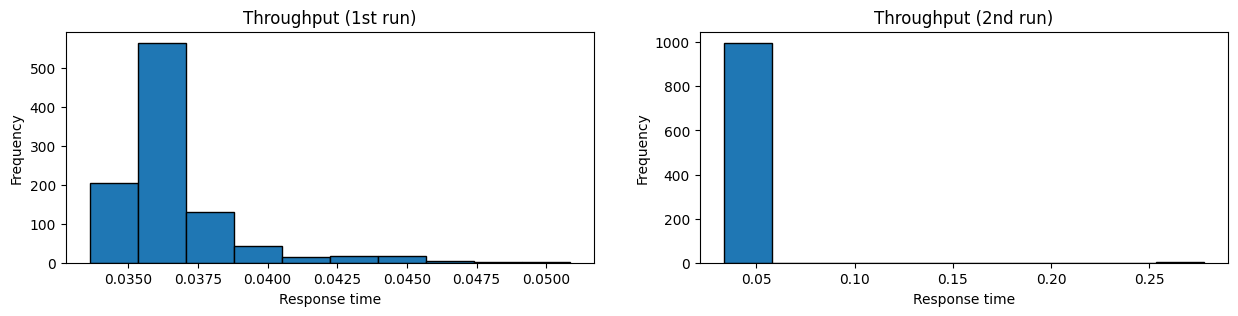

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3))
axes[0].hist(each_run_throughput_1, bins=10, edgecolor="black")
axes[0].set_title("Throughput (1st run)")
axes[0].set_xlabel("Response time")
axes[0].set_ylabel("Frequency")

axes[1].hist(each_run_throughput_2, bins=10, edgecolor="black")
axes[1].set_title("Throughput (2nd run)")
axes[1].set_xlabel("Response time")
axes[1].set_ylabel("Frequency")
plt.show()

In [18]:
filtered_each_run_throughput_1 = filter_outliers(each_run_throughput_1)
filtered_each_run_throughput_2 = filter_outliers(each_run_throughput_2)

In [19]:
print(
    f"Executed 1000 queries.\nAverage time: {sum(filtered_each_run_throughput_1) / len(filtered_each_run_throughput_1):.6f} sec"
)
print(f" Median time: {statistics.median(filtered_each_run_throughput_1):.6f} sec")
print(
    f"Executed 1000 queries.\nAverage time: {sum(filtered_each_run_throughput_2) / len(filtered_each_run_throughput_2):.6f} sec"
)
print(f" Median time: {statistics.median(filtered_each_run_throughput_2):.6f} sec")

Executed 1000 queries.
Average time: 0.036100 sec
 Median time: 0.035993 sec
Executed 1000 queries.
Average time: 0.036160 sec
 Median time: 0.036015 sec


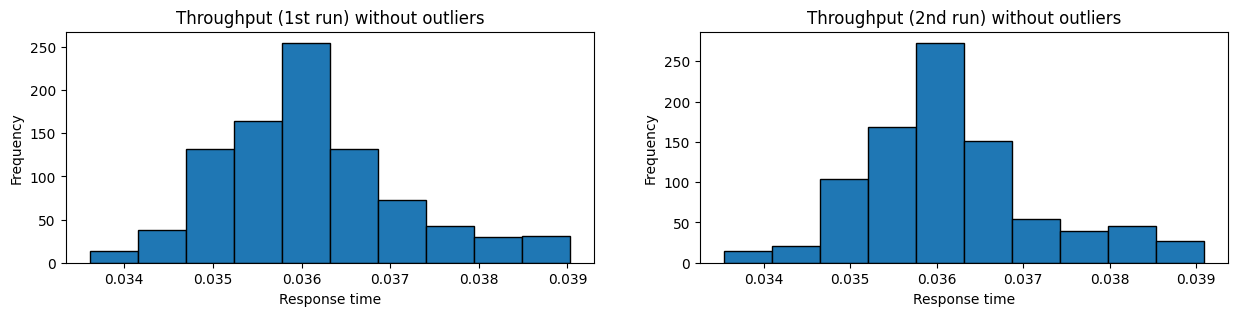

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3))
axes[0].hist(filtered_each_run_throughput_1, bins=10, edgecolor="black")
axes[0].set_title("Throughput (1st run) without outliers")
axes[0].set_xlabel("Response time")
axes[0].set_ylabel("Frequency")

axes[1].hist(filtered_each_run_throughput_2, bins=10, edgecolor="black")
axes[1].set_title("Throughput (2nd run) without outliers")
axes[1].set_xlabel("Response time")
axes[1].set_ylabel("Frequency")
plt.show()

In [21]:
is_statistically_significant(
    first_data=filtered_each_run_throughput_1,
    second_data=filtered_each_run_throughput_2,
)

2026-01-03 20:04:55,256 - Shapiro-Wilk Test for first dataset: p-value = 2.824639190151245e-12
2026-01-03 20:04:55,257 - Shapiro-Wilk Test for second dataset: p-value = 1.4370534535793196e-15
2026-01-03 20:04:55,257 - At least one list is not normally distributed, I perform the Mann-Whitney test.
2026-01-03 20:04:55,259 - Mann-Whitney U Test: p-value = 0.2686002502806991, so...
2026-01-03 20:04:55,260 - There is no basis to reject H0 that the difference in distributions is not statistically significant.


### Connection time

In [22]:
avg_connection_time_1, each_run_connection_time_1 = connection_time(
    n=1000,
    client=client,
)
avg_connection_time_2, each_run_connection_time_2 = connection_time(
    n=1000,
    client=client,
)

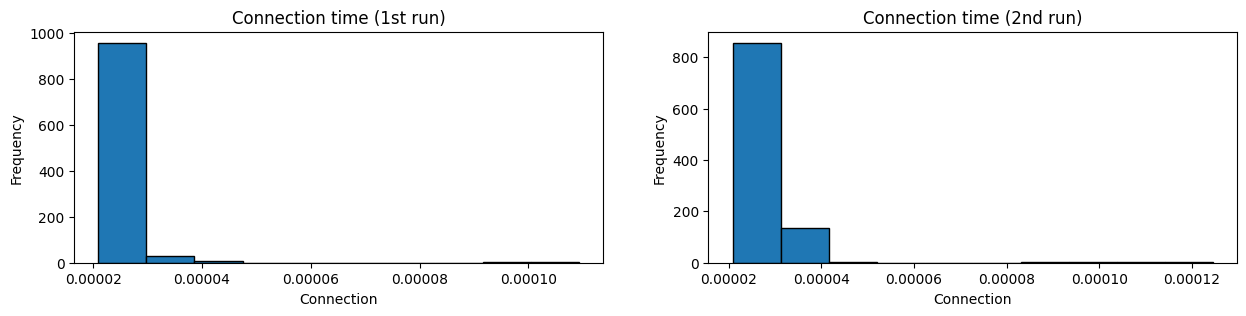

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3))
axes[0].hist(each_run_connection_time_1, bins=10, edgecolor="black")
axes[0].set_title("Connection time (1st run)")
axes[0].set_xlabel("Connection")
axes[0].set_ylabel("Frequency")

axes[1].hist(each_run_connection_time_2, bins=10, edgecolor="black")
axes[1].set_title("Connection time (2nd run)")
axes[1].set_xlabel("Connection")
axes[1].set_ylabel("Frequency")
plt.show()

In [24]:
filtered_each_connection_time_1 = filter_outliers(each_run_connection_time_1)
filtered_each_connection_time_2 = filter_outliers(each_run_connection_time_2)

In [25]:
print(
    f"Executed 1000 connections.\nAverage time: {sum(filtered_each_connection_time_1) / len(filtered_each_connection_time_1):.6f} sec"
)
print(f" Median time: {statistics.median(filtered_each_connection_time_1):.6f} sec")
print(
    f"Executed 1000 connections.\nAverage time: {sum(filtered_each_connection_time_2) / len(filtered_each_connection_time_2):.6f} sec"
)
print(f" Median time: {statistics.median(filtered_each_connection_time_2):.6f} sec")

Executed 1000 connections.
Average time: 0.000022 sec
 Median time: 0.000022 sec
Executed 1000 connections.
Average time: 0.000023 sec
 Median time: 0.000023 sec


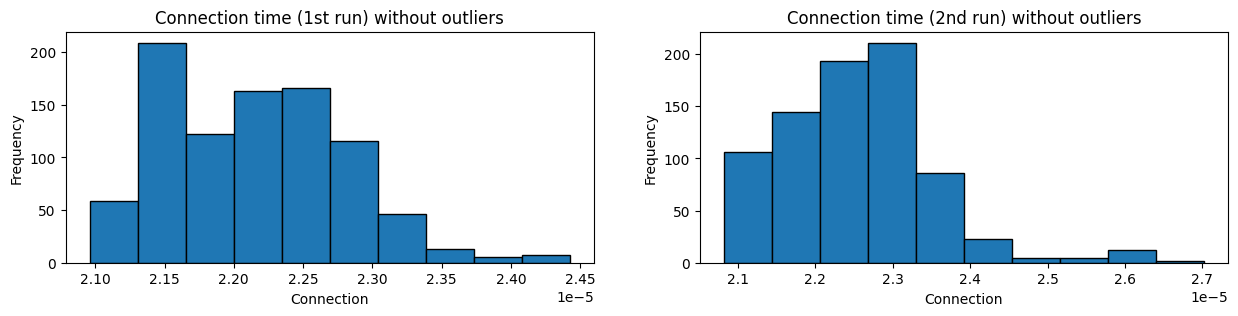

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3))
axes[0].hist(filtered_each_connection_time_1, bins=10, edgecolor="black")
axes[0].set_title("Connection time (1st run) without outliers")
axes[0].set_xlabel("Connection")
axes[0].set_ylabel("Frequency")

axes[1].hist(filtered_each_connection_time_2, bins=10, edgecolor="black")
axes[1].set_title("Connection time (2nd run) without outliers")
axes[1].set_xlabel("Connection")
axes[1].set_ylabel("Frequency")
plt.show()

In [27]:
is_statistically_significant(
    first_data=filtered_each_connection_time_1,
    second_data=filtered_each_connection_time_2,
)

2026-01-03 20:04:55,779 - Shapiro-Wilk Test for first dataset: p-value = 1.2814117804881438e-13
2026-01-03 20:04:55,779 - Shapiro-Wilk Test for second dataset: p-value = 2.5934118995372367e-18
2026-01-03 20:04:55,780 - At least one list is not normally distributed, I perform the Mann-Whitney test.
2026-01-03 20:04:55,781 - Mann-Whitney U Test: p-value = 3.9442282245376686e-19, so...
2026-01-03 20:04:55,781 - Because the p-value is less than the assumed significance level (α=0.05), the difference between the distributions is statistically significant. We can therefore reject the null hypothesis and accept the alternative that the distributions of the two samples differ statistically significantly.


### Write performance

In [28]:
client = pymongo.MongoClient(os.environ["MONGO_URI"])
avg_write_performance_1, each_run_write_performance_1 = write_performance(
    n=1000,
    client=client,
    database="nieruchomosci",
    collection="boston",
)
avg_write_performance_2, each_run_write_performance_2 = write_performance(
    n=1000,
    client=client,
    database="nieruchomosci",
    collection="boston",
)

2026-01-03 20:04:55,983 - Checking write performance for 1000 operations...
2026-01-03 20:05:34,650 - Finished checking write performance...
2026-01-03 20:05:34,651 - Write performance: 25 operations per second...
2026-01-03 20:05:34,651 - Checking write performance for 1000 operations...
2026-01-03 20:06:12,560 - Finished checking write performance...
2026-01-03 20:06:12,561 - Write performance: 26 operations per second...


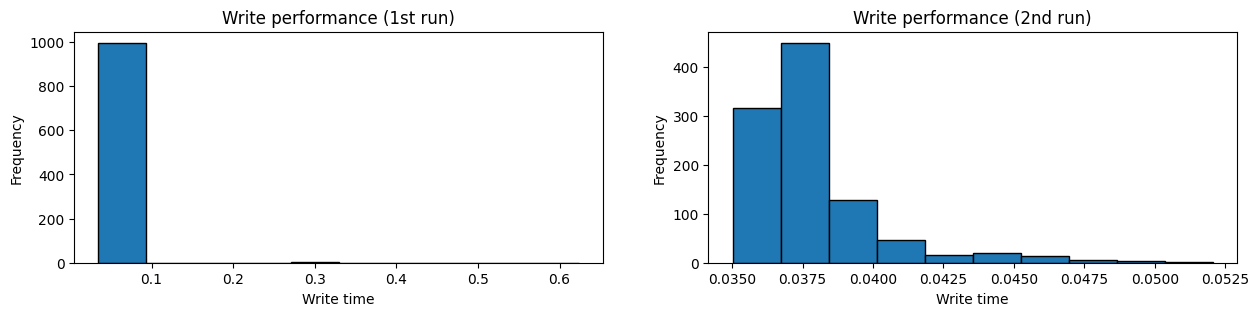

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3))
axes[0].hist(each_run_write_performance_1, bins=10, edgecolor="black")
axes[0].set_title("Write performance (1st run)")
axes[0].set_xlabel("Write time")
axes[0].set_ylabel("Frequency")

axes[1].hist(each_run_write_performance_2, bins=10, edgecolor="black")
axes[1].set_title("Write performance (2nd run)")
axes[1].set_xlabel("Write time")
axes[1].set_ylabel("Frequency")
plt.show()

In [30]:
filtered_each_write_performance_1 = filter_outliers(each_run_write_performance_1)
filtered_each_write_performance_2 = filter_outliers(each_run_write_performance_2)

In [31]:
print(
    f"Inserted 1000 rows.\nAverage time: {sum(filtered_each_write_performance_1) / len(filtered_each_write_performance_1):.6f} sec"
)
print(f" Median time: {statistics.median(filtered_each_write_performance_1):.6f} sec")
print(
    f"Inserted 1000 queries.\nAverage time: {sum(filtered_each_write_performance_2) / len(filtered_each_write_performance_2):.6f} sec"
)
print(f" Median time: {statistics.median(filtered_each_write_performance_2):.6f} sec")

Inserted 1000 rows.
Average time: 0.037072 sec
 Median time: 0.036851 sec
Inserted 1000 queries.
Average time: 0.037404 sec
 Median time: 0.037269 sec


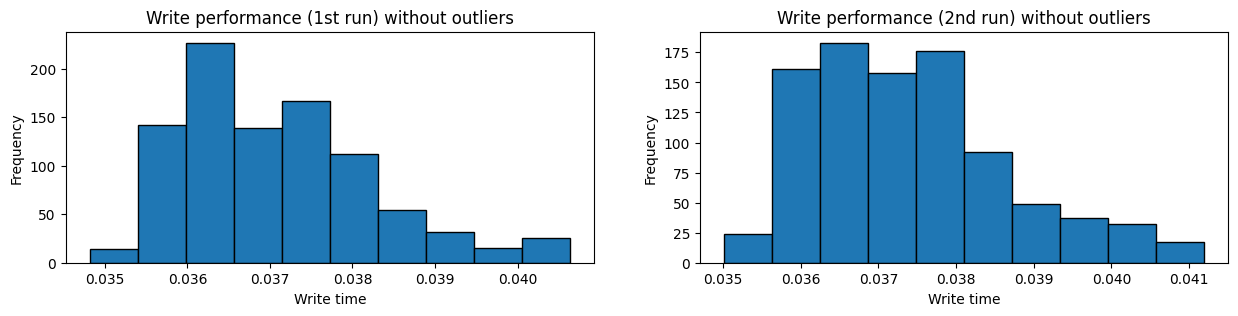

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3))
axes[0].hist(filtered_each_write_performance_1, bins=10, edgecolor="black")
axes[0].set_title("Write performance (1st run) without outliers")
axes[0].set_xlabel("Write time")
axes[0].set_ylabel("Frequency")

axes[1].hist(filtered_each_write_performance_2, bins=10, edgecolor="black")
axes[1].set_title("Write performance (2nd run) without outliers")
axes[1].set_xlabel("Write time")
axes[1].set_ylabel("Frequency")
plt.show()

In [33]:
is_statistically_significant(
    first_data=filtered_each_write_performance_1,
    second_data=filtered_each_write_performance_2,
)

2026-01-03 20:06:13,050 - Shapiro-Wilk Test for first dataset: p-value = 5.639401483308425e-18
2026-01-03 20:06:13,050 - Shapiro-Wilk Test for second dataset: p-value = 7.375566554837608e-17
2026-01-03 20:06:13,050 - At least one list is not normally distributed, I perform the Mann-Whitney test.
2026-01-03 20:06:13,052 - Mann-Whitney U Test: p-value = 5.7583798408011424e-09, so...
2026-01-03 20:06:13,053 - Because the p-value is less than the assumed significance level (α=0.05), the difference between the distributions is statistically significant. We can therefore reject the null hypothesis and accept the alternative that the distributions of the two samples differ statistically significantly.
